In [1]:
from qiskit import *
from qiskit.tools.monitor import *
from qiskit.tools.visualization import *

In [2]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.draw()
meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

{'11': 482, '00': 518}


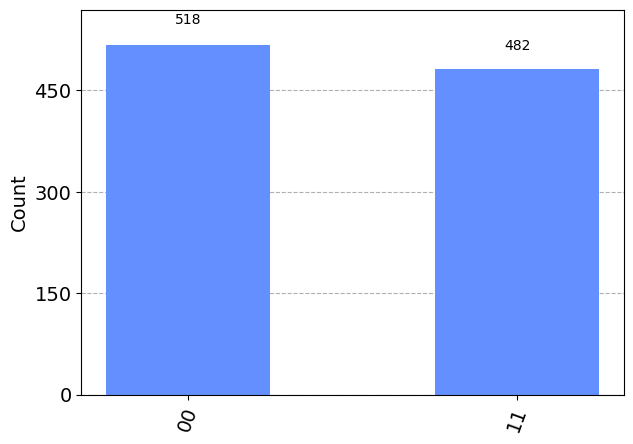

In [3]:
#execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)
plot_histogram(counts)

In [4]:
# Execute 2-qubit Bell state again
second_result = backend.run(transpile(circ, backend), shots=1000).result()
second_counts  = second_result.get_counts(circ)

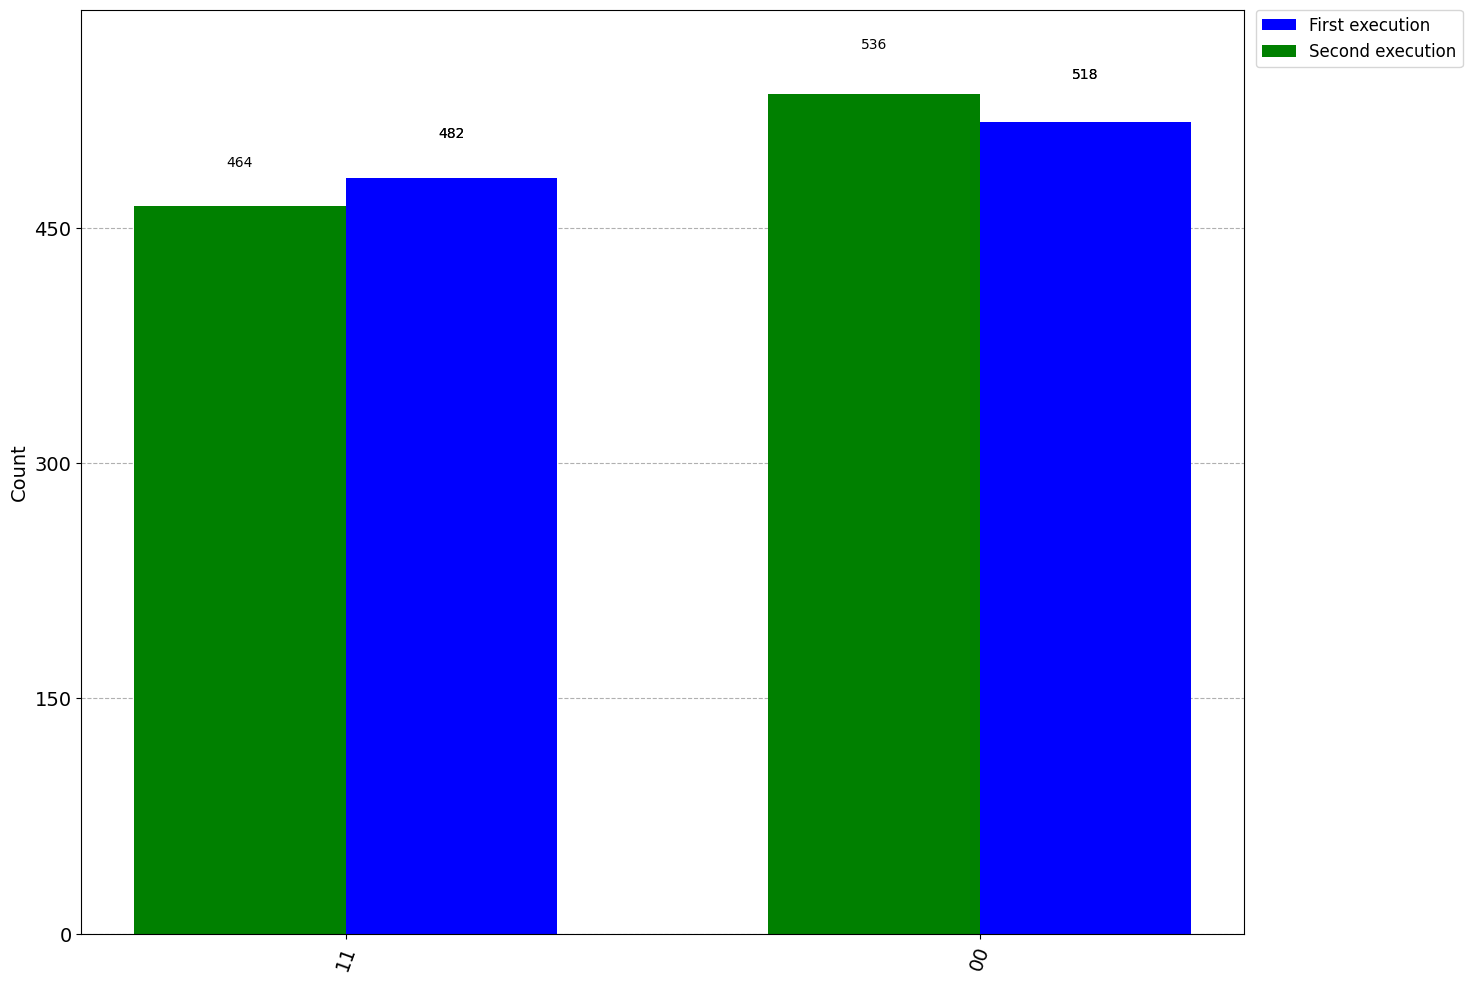

In [8]:
#Plot results with legend and colour scheme
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12), color=['blue', 'green'])

In [6]:
#execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(bell, backend)).result()
psi  = result.get_statevector(bell)

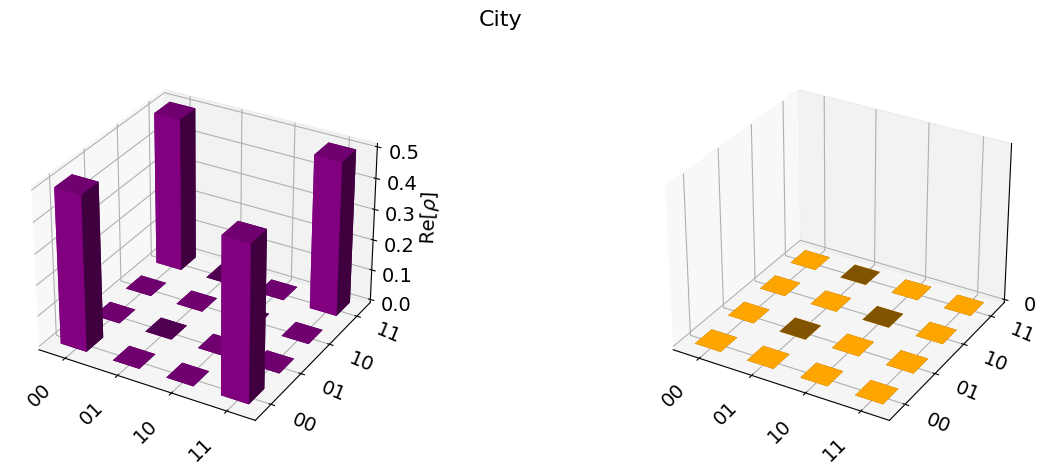

In [11]:
#examples of different visualisation techniques
plot_state_city(psi, title="City", color=['purple', 'orange'])

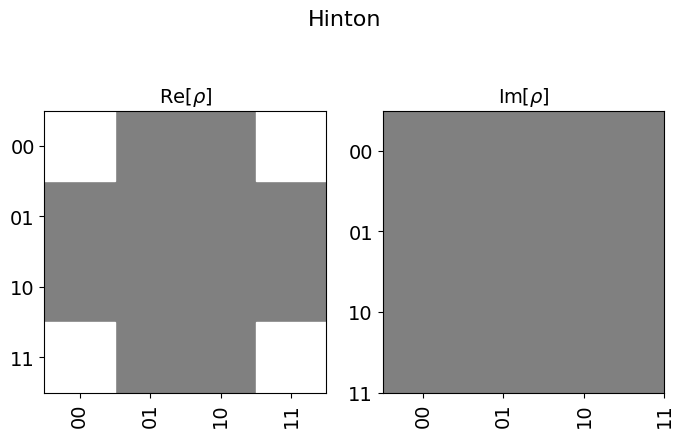

In [12]:
plot_state_hinton(psi, title="Hinton")

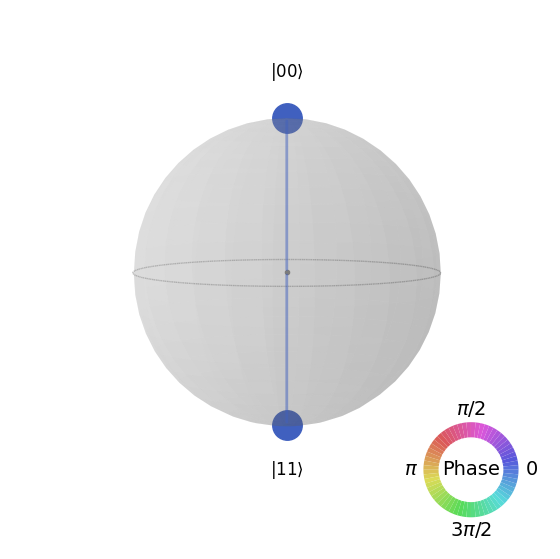

In [13]:
plot_state_qsphere(psi) #title="Q-Shpere")

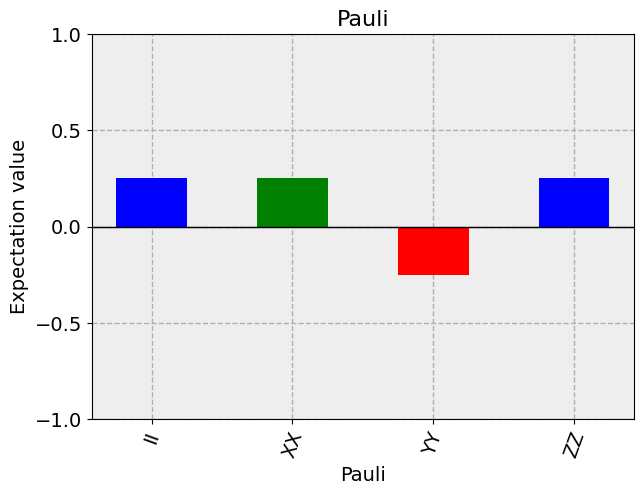

In [14]:
plot_state_paulivec(psi, title="Pauli", color=['blue', 'green', 'red'])

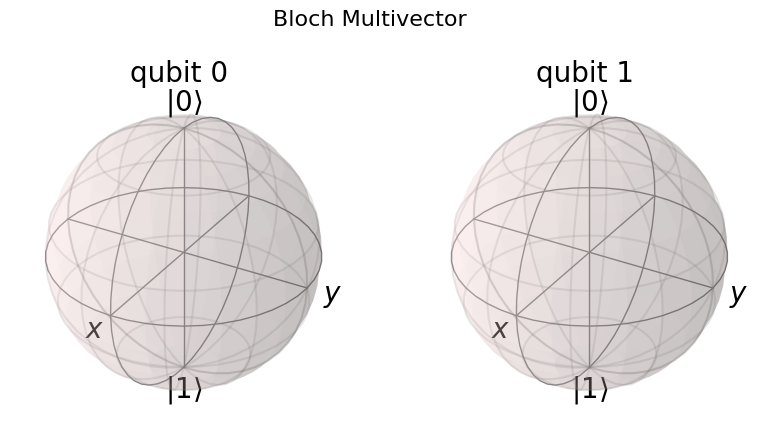

In [15]:
plot_bloch_multivector(psi, title="Bloch Multivector")